In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt # Importng Necessary Librarires

In [2]:
df = pd.read_csv('TeslaDataset.csv')
dataset = df.copy()
# print(dataset) # Making a Copy of The Dataset

In [3]:
dataset['Date'] = dataset['Date'].astype('str') # Converting Serires type of Date to strnto strip Month and Year

In [4]:
dataset['Year'] = dataset['Date'].str[0:4]
dataset['Month'] = dataset['Date'].str[5:7]
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Month'] = pd.to_numeric(dataset['Month'])

In [5]:
year_group = dataset.groupby('Year').sum() # Grouping The dataset By year
month_group = dataset.groupby('Month').sum() # Grouping the dataset by Month
print(year_group.head())
print(month_group.head())

              Open          High           Low         Close     Adj Close  \
Year                                                                         
2010   3043.040010   3130.040003   2943.989989   3034.440000   3034.440000   
2011   6759.140023   6899.820015   6600.929988   6754.799989   6754.799989   
2012   7800.779975   7952.289998   7636.469991   7792.150009   7792.150009   
2013  26312.939975  26926.959915  25648.530058  26309.109891  26309.109891   
2014  56300.680035  57317.369975  55239.940098  56278.930066  56278.930066   

          Volume  Month  
Year                     
2010   205369100   1229  
2011   325235100   1650  
2012   307449000   1625  
2013  2118745900   1649  
2014  1742321300   1651  
               Open          High           Low         Close     Adj Close  \
Month                                                                         
1      42685.410098  43538.389837  41926.889981  42885.380016  42885.380016   
2      31000.339948  31715.459975 

C:\Users\Legion\AppData\Local\Temp/ipykernel_14664/4734321.py:25: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot_date(dataset['Date'],dataset['Volume'],color='#2e6e3f',label = 'Volume Sold for 10 Years',linestyle='solid',marker=False)


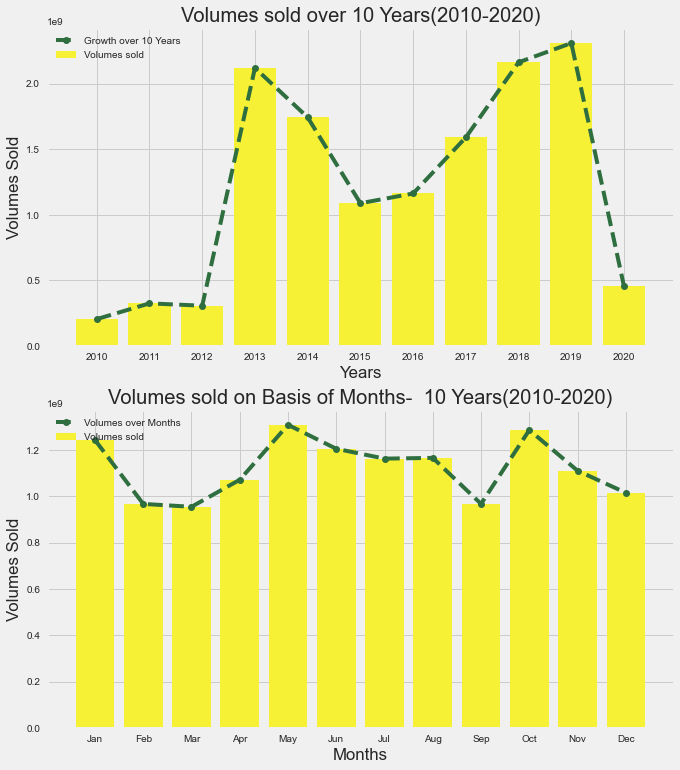

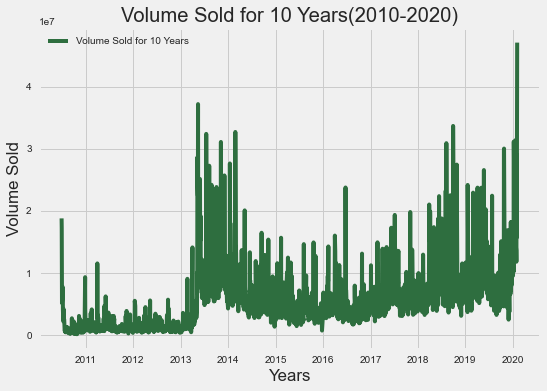

In [6]:
plt.style.use(['seaborn','fivethirtyeight'])  # Specifying the dtyle of the plot
fig_vol = plt.figure(figsize=(10,12)) # Creating a figure
ax = fig_vol.add_subplot(211) # Adding a subplot
ax.plot(dataset['Year'].unique(),year_group['Volume'],color='#2e6e3f',linestyle='--',marker = 'o',label = 'Growth over 10 Years')
ax.bar(dataset['Year'].unique(),year_group['Volume'],color='#f7f136',label = 'Volumes sold ') # Plotting
ax.set_title('Volumes sold over 10 Years(2010-2020)')
ax.set_xlabel('Years')
ax.set_ylabel('Volumes Sold')
# ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}'))  # --> Can be used to show whole numbers on Yticks need to import
# StrMethodFormatter form matplotlib.ticker
plt.legend()

months = [dt.strptime(str(month),"%m").strftime("%b") for month in range(1,13)] # Creating a List Of months
ax1 = fig_vol.add_subplot(212)
ax1.plot(months,month_group['Volume'],color='#2e6e3f',linestyle='--',marker = 'o',label = 'Volumes over Months')
ax1.bar(months,month_group['Volume'],color='#f7f136',label = 'Volumes sold ')
ax1.set_xticks(months)
ax1.set_title('Volumes sold on Basis of Months-  10 Years(2010-2020)')
ax1.set_xlabel('Months')
ax1.set_ylabel('Volumes Sold')
plt.legend(loc = 'upper left')

fig_vol_total = plt.figure()
ax = fig_vol_total.add_subplot()
ax.plot_date(dataset['Date'],dataset['Volume'],color='#2e6e3f',label = 'Volume Sold for 10 Years',linestyle='solid',marker=False)
ax.set_title('Volume Sold for 10 Years(2010-2020)')
ax.set_xlabel('Years')
ax.set_ylabel('Volume Sold')
plt.legend()


plt.show()

fig_vol.savefig('Totat_Volume_plot.png',dpi=300)
fig_vol_total.savefig('Volume_over_10_years.png',dpi = 300)

C:\Users\Legion\AppData\Local\Temp/ipykernel_14664/1259345331.py:22: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  ax.plot_date(dataset['Date'],dataset['Adj Close'],color='#5865a3',label = 'Adj Closing Price for 10 Years',linestyle='solid',marker=False)


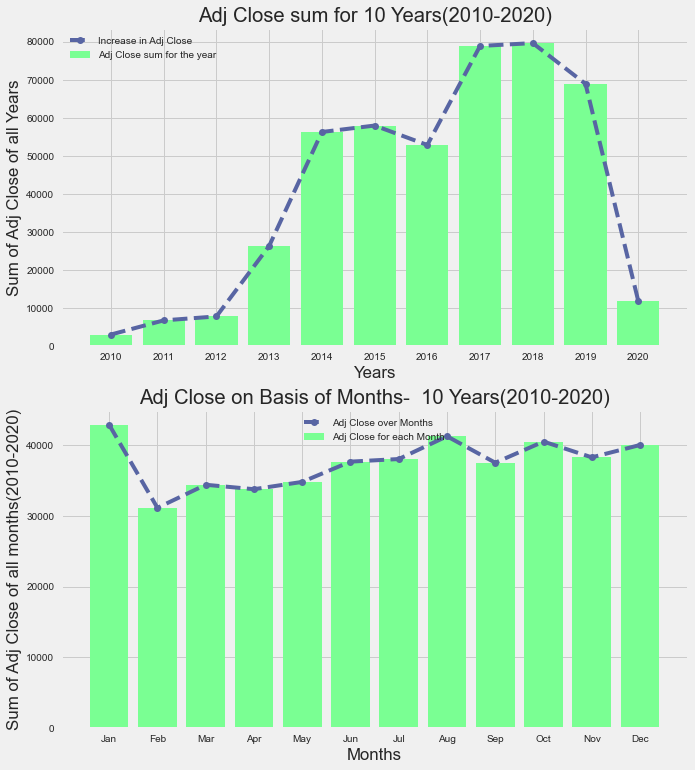

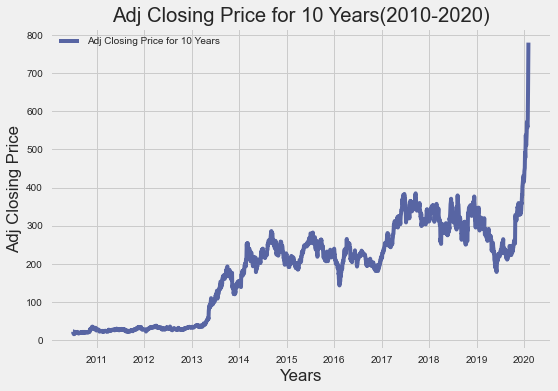

In [7]:
fig_adj = plt.figure(figsize=(10,12))
ax = fig_adj.add_subplot(211)
ax.plot(dataset['Year'].unique(),year_group['Adj Close'],color='#5865a3',linestyle='--',marker = 'o',label = 'Increase in Adj Close')
ax.bar(dataset['Year'].unique(),year_group['Adj Close'],color='#7aff93',label = 'Adj Close sum for the year')
ax.set_title('Adj Close sum for 10 Years(2010-2020)')
ax.set_xlabel('Years')
ax.set_ylabel('Sum of Adj Close of all Years')
plt.legend()

ax1 = fig_adj.add_subplot(212)
ax1.plot(months,month_group['Adj Close'],color='#5865a3',linestyle='--',marker = 'o',label = 'Adj Close over Months')
ax1.bar(months,month_group['Adj Close'],color='#7aff93',label = 'Adj Close for each Month')
ax1.set_xticks(months)
ax1.set_title('Adj Close on Basis of Months-  10 Years(2010-2020)')
ax1.set_xlabel('Months')
ax1.set_ylabel('Sum of Adj Close of all months(2010-2020)')
plt.legend(loc = 'upper center')


fig_adj_total = plt.figure()
ax = fig_adj_total.add_subplot()
ax.plot_date(dataset['Date'],dataset['Adj Close'],color='#5865a3',label = 'Adj Closing Price for 10 Years',linestyle='solid',marker=False)
ax.set_title('Adj Closing Price for 10 Years(2010-2020)')
ax.set_xlabel('Years')
ax.set_ylabel('Adj Closing Price')

# fig_adj.autofmt_xdate()

plt.legend()
plt.show()
fig_adj.savefig('Adj_close_10_years.png',dpi = 300)
fig_adj_total.savefig('Total_Adj_values.png',dpi = 300)